 Project Title

Customer Churn Analysis and Retention Insights Using Python

Objective

Analyze customer behavior to identify key factors contributing to customer churn and provide actionable insights to improve retention strategies.

Libraries 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Load dataset

In [102]:
df = pd.read_csv(r"C:\Users\kiran\Downloads\WA_Fn-UseC_-Telco-Customer-Churn (2).csv")

Clean Data

In [103]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
 # Remove missing values

# Quick overview
print(df.info())
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Visualization

Customer Churn Distribution

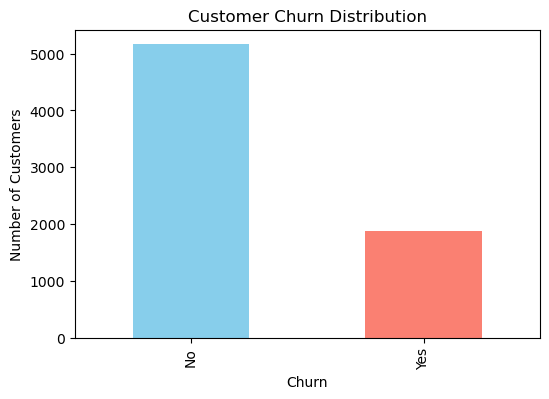

In [104]:
legend=False
plt.figure(figsize=(6,4))
df['Churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")
plt.show()

Insight: Month-to-month customers have the highest churn.

Churn by Contract Type

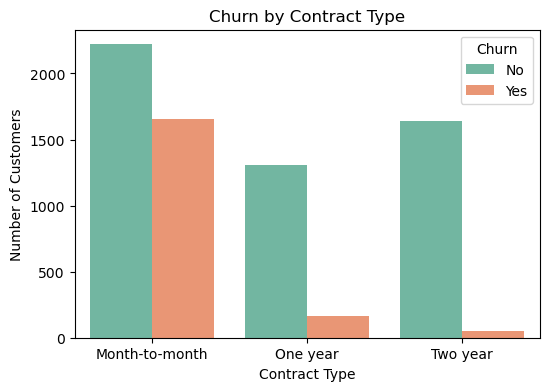

In [105]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Churn by Contract Type")
plt.show()


Insight: Month-to-month customers have the highest churn.

Monthly Charges vs Churn (Box Plot)

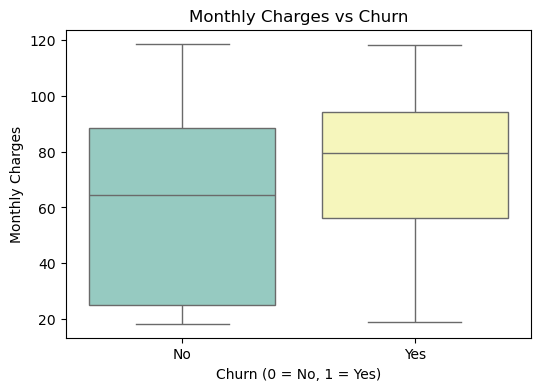

In [106]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    data=df,
    palette='Set3',
    legend=False
)
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges vs Churn")
plt.show()



Insight: Higher monthly charges increase churn risk.

Tenure vs Churn Rate (Line Chart)

<Figure size 600x400 with 0 Axes>

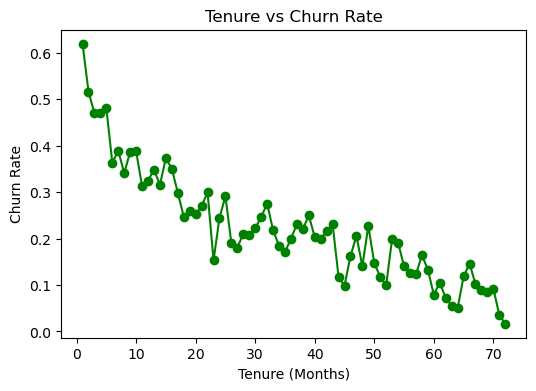

In [107]:
tenure_churn = df.groupby('tenure')['Churn'].apply(lambda x: (x=='Yes').mean())

plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.plot(tenure_churn, color='green', marker='o')
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("Tenure vs Churn Rate")
plt.show()


Insight: New customers churn more than long-term customers.

Churn by Payment Method (Horizontal Bar Chart)

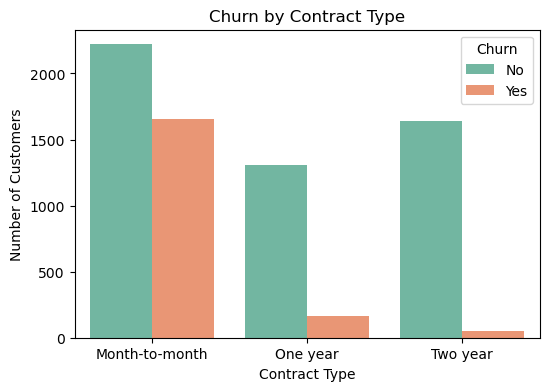

In [108]:

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Churn by Contract Type")
plt.show()


Insight: Electronic check users show higher churn.

Histogram – Monthly Charges Distribution

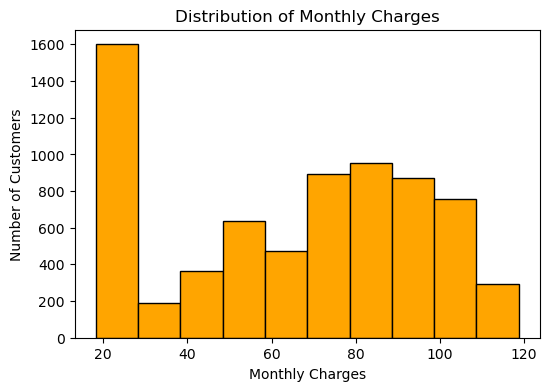

In [109]:
plt.figure(figsize=(6,4))
plt.hist(df['MonthlyCharges'], bins=10,color='orange', edgecolor='black')
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Distribution of Monthly Charges")
plt.show()


Insight: Most customers fall in the mid-range; few have very high charges.

Pie Chart – Churn Percentage

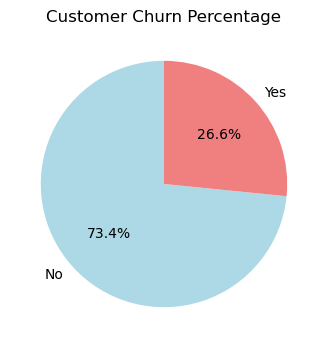

In [110]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%.1f%%", startangle=90, colors=['lightblue','lightcoral'])
plt.title("Customer Churn Percentage")
plt.show()

Insight: Shows proportion of retained vs churned customers.

Conclusion

- Customers with month-to-month contracts are more likely to churn.
- Higher monthly charges increase churn probability.
- Long-term contracts and lower charges improve retention.

Business Impact

These insights help companies design better pricing and contract strategies to reduce churn.